In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics


In [2]:
df = pd.read_csv('profiles.csv')

In [3]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

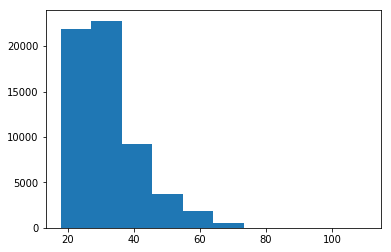

In [4]:
plt.hist(df.age)
plt.show()

In [5]:
all_data = df

In [6]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
all_data["drinks_code"] = all_data.drinks.map(drink_mapping)

In [7]:
drugs_mapping = {"never":0, "sometimes": 1, "often": 2}
all_data["drugs_code"] = all_data.drugs.map(drugs_mapping)

In [8]:
smokes_mapping = {"no": 0, "when drinking":1, "sometimes": 2, "trying to quit":3 , "yes": 4}
all_data["smokes_code"] = all_data.smokes.map(smokes_mapping)

In [9]:
all_data.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

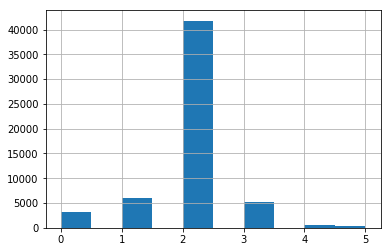

In [10]:
all_data['drinks_code'].hist()

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 3267.,     0.,  5957.,     0., 41780.,     0.,  5164.,     0.,
          471.,   322.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

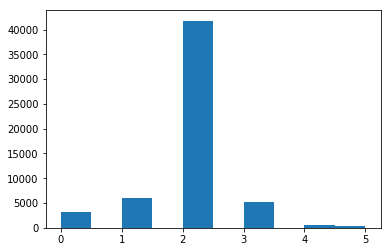

In [11]:
plt.hist(all_data["drinks_code"])

In [12]:
df.drugs.unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

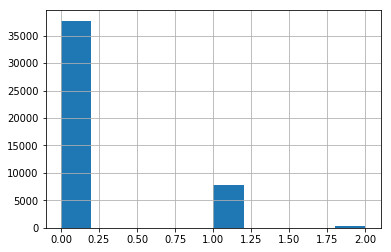

In [13]:
all_data["drugs_code"].hist()

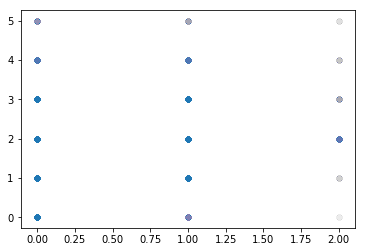

In [14]:
plt.scatter(all_data['drugs_code'], all_data['drinks_code'], alpha = 0.004)

In [15]:
df.smokes.unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

(array([43896.,     0.,  3040.,     0.,     0.,  3787.,     0.,  1480.,
            0.,  2231.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

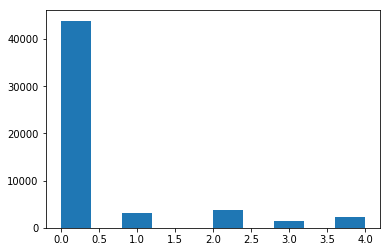

In [16]:
plt.hist(all_data["smokes_code"], bins = 10)

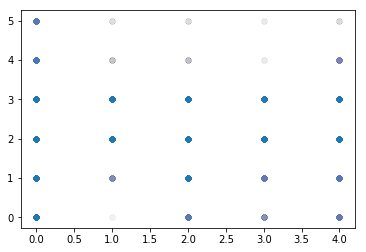

In [17]:
plt.scatter(all_data.smokes_code, all_data.drinks_code, alpha = 0.002)

In [18]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


all_data["essay_len"] = all_essays.apply(lambda x: len(x))

In [19]:
all_data['avg_word_length'] = all_data.essay_len/ all_essays.apply(lambda x: len(x.split(' ')))

In [20]:
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


In [21]:
#all_data['drinks_code'] = all_data['drinks_code'].dropna()

In [22]:
all_data = all_data.dropna()

In [23]:
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

## KNN for sign 


In [24]:
from sklearn.metrics import accuracy_score
l = []
list_i = []
x_train, x_test, y_train, y_test = train_test_split(feature_data, all_data.sign, test_size = 0.25, random_state=12)

for i in range(1,500):
    neigh = KNeighborsClassifier(n_neighbors = i)

    neigh.fit(x_train, y_train)
    kpred = neigh.predict(x_test)
    l.append(accuracy_score(kpred, y_test))
    
    list_i.append(i)

In [25]:
max(l)

0.041742286751361164

In [26]:
from sklearn.metrics import confusion_matrix
metrics.precision_score(y_test, kpred, average = 'weighted')


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.013308577104397238

In [27]:
metrics.recall_score(y_test, kpred, average = 'weighted')

0.02722323049001815

In [28]:
l.index(max(l))

2

In [29]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)
kpred = neigh.predict(x_test)
accuracy_score(kpred, y_test)


0.041742286751361164

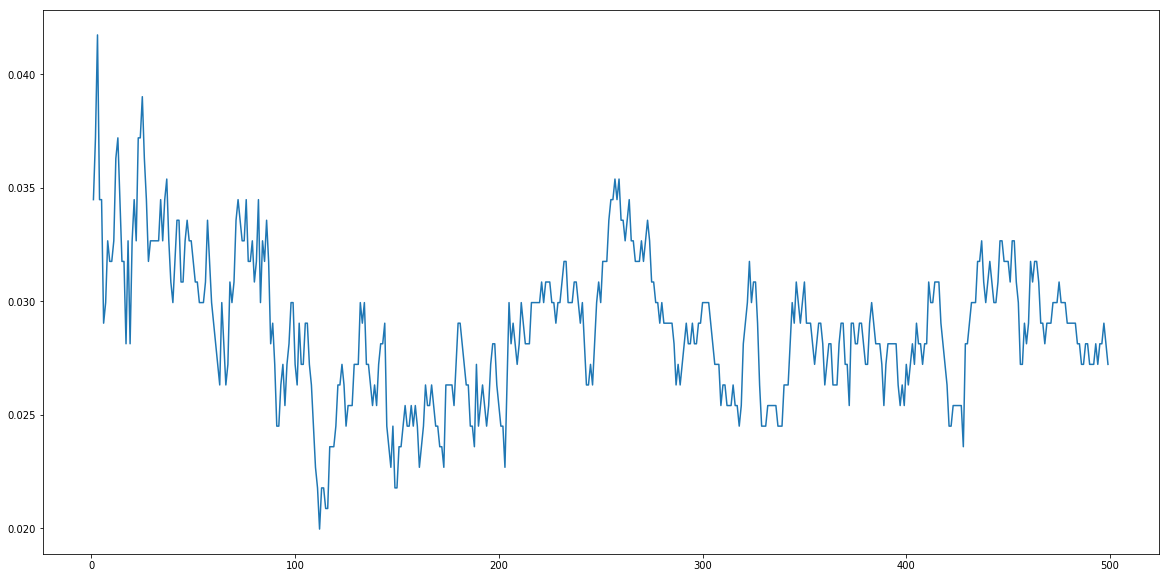

In [30]:
plt.figure(figsize = (20,10))
plt.plot(list_i, l)



## SIGN  SVC


In [31]:
from sklearn.svm import SVC

In [32]:
acc=[]
l =[]
for i in ('linear', 'poly', 'rbf', 'sigmoid'):
    svc = SVC(kernel = i)
    svc.fit(x_train, y_train)
    spred = svc.predict(x_test)
    acc.append(accuracy_score(spred, y_test))
    l.append(i)

In [33]:
max(acc)

0.030852994555353903

In [34]:
l[acc.index(max(acc))]

'rbf'

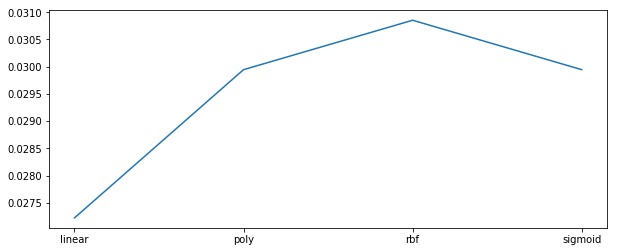

In [35]:
plt.figure(figsize = (10,4))

plt.plot(l, acc)

In [36]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
spred = svc.predict(x_test)

In [38]:
accuracy_score(spred, y_test)

0.030852994555353903

In [39]:
metrics.precision_score(y_test, spred, average = 'weighted')


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0052635746431512346

In [40]:
metrics.recall_score(y_test, spred, average = 'weighted')

0.030852994555353903

In [41]:
education_mapping ={"working on college/university":0,
"working on space camp":1,
"graduated from masters program":2,
"graduated from college/university":3,
"working on two-year college":4,
"graduated from high school":5,
"working on masters program":6,
"graduated from space camp":7,
"college/university":8,
"dropped out of space camp":9,
"graduated from ph.d program" :10,
"graduated from law school":11,
"working on ph.d program":12,
"two-year college":13,
"graduated from two-year college" :14,
"working on med school":15,
"dropped out of college/university" :16,
"space camp":17,
"graduated from med school" :18,
"dropped out of high school" :19,
"working on high school" :20,
"masters program" :21,
"dropped out of ph.d program" :22,
"dropped out of two-year college" :23,
"dropped out of med school" :24,
"high school" :25,
"working on law school" :26,
"law school" :27,
"dropped out of masters program" :28,
"ph.d program":29,
"dropped out of law school" :30,
"med school":31}
all_data["education_code"] = df.education.map(education_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
status_mapping = {"single": 0, "available": 1, "seeing someone": 2, "married": 3}
all_data["status_code"] = all_data.status.map(status_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
sex_mapping = {"m": 0, "f": 1}
all_data["sex_code"] = all_data.sex.map(sex_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 4407 artists>

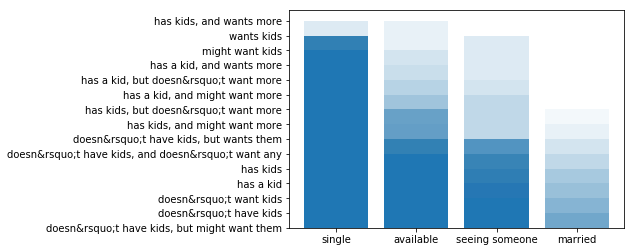

In [44]:
plt.bar(all_data.status, all_data.offspring, alpha=0.05)

Predicting offspring with education age ang status

## Predicting offspring with edu age status - SVC 

In [45]:
off_features = all_data[['education_code', 'age', 'status_code']]

x_train, x_test, y_train, y_test = train_test_split(off_features, all_data.offspring, test_size = 0.2)


In [46]:
a = off_features.values
min_max_scaler = MinMaxScaler()
a_scaled = min_max_scaler.fit_transform(a)


off_features = pd.DataFrame(a_scaled, columns=off_features.columns)

In [47]:

off_svc = SVC(kernel='rbf')
off_svc.fit(x_train, y_train)
off_k_pred = off_svc.predict(x_test)
accuracy_score(off_svc.predict(x_test), y_test)

0.29705215419501135

In [49]:
metrics.precision_score(y_test, off_k_pred, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2668558617339008

In [50]:
metrics.recall_score(y_test, off_k_pred, average = 'weighted')

0.29705215419501135

## OFFSPRING KN

In [51]:
x=[]
y=[]
for i in range(1,200):
    off_k = KNeighborsClassifier(n_neighbors = i)
    off_k.fit(x_train, y_train)
    x.append(i)
    y.append(accuracy_score(off_k_pred, y_test))
max(y)

0.29705215419501135

In [52]:
x[y.index(max(y))]

1

In [53]:
ff_k = KNeighborsClassifier(n_neighbors = 1)
off_k.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=199, p=2,
           weights='uniform')

In [54]:
off_k_pred = off_k.predict(x_test)

In [55]:
metrics.precision_score(y_test, off_k_pred, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.1765326671619384

In [56]:
metrics.recall_score(y_test, off_k_pred, average = 'weighted')

0.25963718820861675

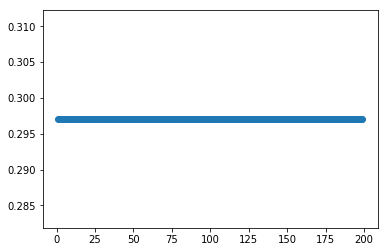

In [57]:
plt.scatter(x,y)

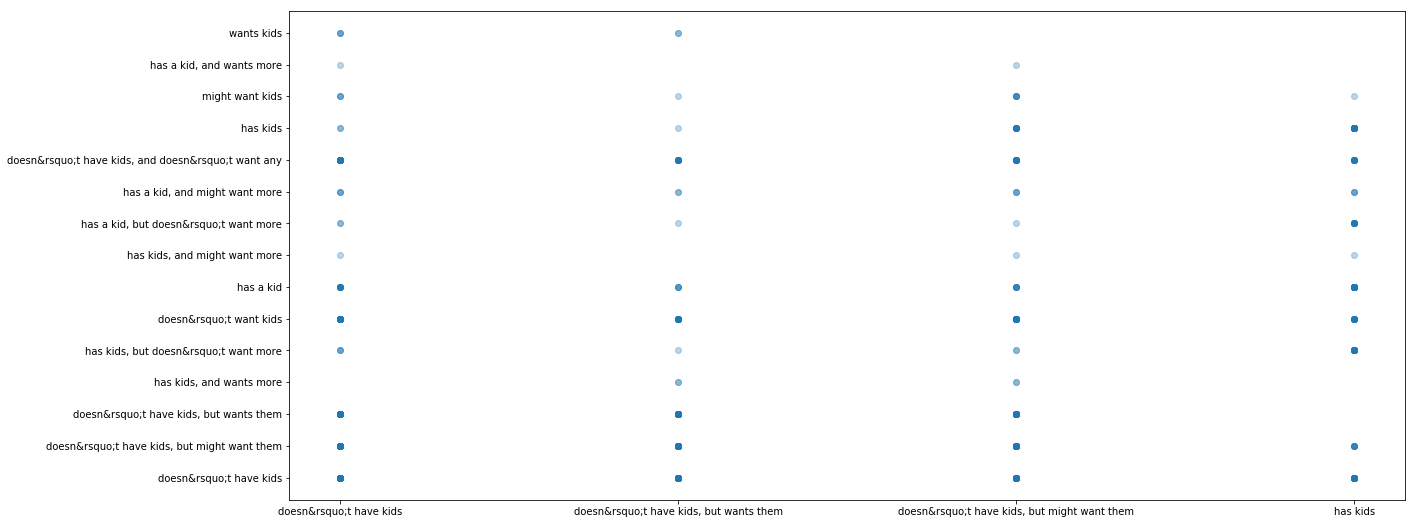

In [58]:
plt.figure(figsize=(20,9))

plt.scatter(off_k_pred, y_test, alpha = 0.3)

In [59]:
all_data.status.unique()

array(['single', 'available', 'seeing someone', 'married'], dtype=object)

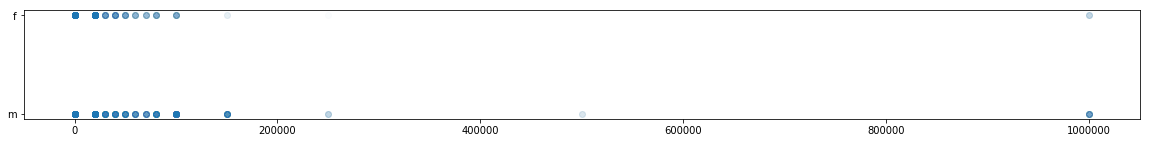

In [60]:
plt.figure(figsize=(20,2))
plt.scatter(all_data.income, all_data.sex, alpha=0.02)

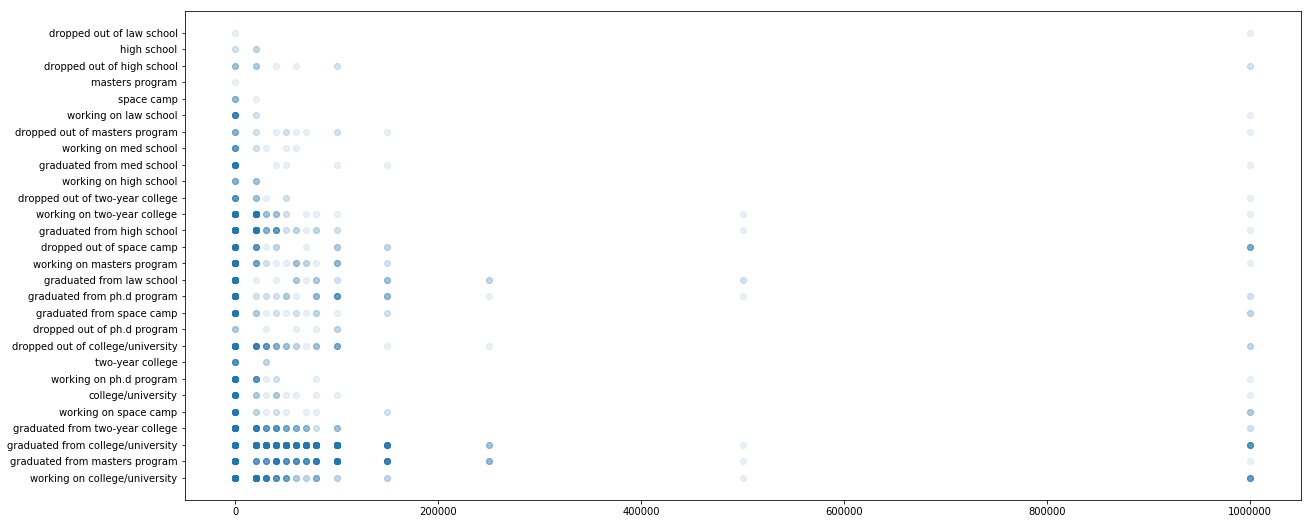

In [61]:
plt.figure(figsize=(20,9))

plt.scatter(all_data.income, all_data.education, alpha=0.1)

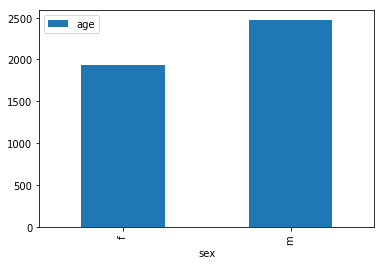

In [62]:
all_data[["age", "sex"]].groupby("sex").count().plot(kind = 'bar')

In [63]:
import seaborn as sns 

PREDICTING INCOME WITH SEX AND EDUCATION - KNN 

In [64]:
all_data.job.unique()

array(['transportation', 'science / tech / engineering',
       'executive / management', 'artistic / musical / writer', 'other',
       'unemployed', 'medicine / health', 'sales / marketing / biz dev',
       'computer / hardware / software', 'entertainment / media',
       'banking / financial / real estate', 'student',
       'clerical / administrative', 'construction / craftsmanship',
       'education / academia', 'military', 'law / legal services',
       'political / government', 'rather not say', 'hospitality / travel',
       'retired'], dtype=object)

In [65]:
status_mapping = {"single": 0, "available": 1, "seeing someone": 2, "married": 3}
all_data["status_code"] = all_data.status.map(status_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
job_mapping = {'transportation':0, 
               'science / tech / engineering': 1, 
               'executive / management':2, 
               'artistic / musical / writer':19, 
               'other':3, 
               'unemployed':4, 
               'medicine / health':5, 
               'sales / marketing / biz dev':6,
               'computer / hardware / software':7, 
               'entertainment / media':8, 
               'banking / financial / real estate':9, 
               'student':10,
               'clerical / administrative':11, 
               'construction / craftsmanship':12,
                'education / academia':13, 
                'military':14, 
               'law / legal services':15,
                'political / government':16, 
               'rather not say':17, 
               'hospitality / travel':18,
               'retired':20}
all_data["job_code"] = all_data.job.map(job_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
n = 0
for i in all_data.ethnicity.unique():
    print("'" + i +"'" + ' : ' + str(n)+',')
    n = n + 1

'asian, white' : 0,
'white' : 1,
'asian' : 2,
'black, native american, hispanic / latin' : 3,
'hispanic / latin, white' : 4,
'hispanic / latin' : 5,
'indian' : 6,
'native american, white' : 7,
'other' : 8,
'asian, pacific islander' : 9,
'white, other' : 10,
'native american, white, other' : 11,
'pacific islander' : 12,
'black' : 13,
'middle eastern' : 14,
'black, hispanic / latin' : 15,
'asian, black, white' : 16,
'asian, pacific islander, white' : 17,
'indian, white' : 18,
'black, white, other' : 19,
'black, white' : 20,
'middle eastern, white' : 21,
'indian, hispanic / latin' : 22,
'pacific islander, hispanic / latin, white' : 23,
'asian, pacific islander, other' : 24,
'black, hispanic / latin, white' : 25,
'asian, black, native american' : 26,
'native american, pacific islander, hispanic / latin, white, other' : 27,
'black, native american, white' : 28,
'black, other' : 29,
'asian, indian' : 30,
'asian, middle eastern, black, native american, indian, pacific islander, hispanic / lat

In [68]:
location_mapping = {'south san francisco, california' : 0,
'san francisco, california' : 1,
'menlo park, california' : 2,
'vallejo, california' : 3,
'benicia, california' : 4,
'berkeley, california' : 5,
'walnut creek, california' : 6,
'oakland, california' : 7,
'lafayette, california' : 8,
'san mateo, california' : 9,
'san rafael, california' : 10,
'redwood city, california' : 11,
'mill valley, california' : 12,
'hayward, california' : 13,
'sausalito, california' : 14,
'san leandro, california' : 15,
'moraga, california' : 16,
'albany, california' : 17,
'martinez, california' : 18,
'alameda, california' : 19,
'palo alto, california' : 20,
'crockett, california' : 21,
'stanford, california' : 22,
'fairfax, california' : 23,
'pleasant hill, california' : 24,
'half moon bay, california' : 25,
'emeryville, california' : 26,
'el sobrante, california' : 27,
'el cerrito, california' : 28,
'pacifica, california' : 29,
'corte madera, california' : 30,
'green brae, california' : 31,
'novato, california' : 32,
'hercules, california' : 33,
'belmont, california' : 34,
'mountain view, california' : 35,
'millbrae, california' : 36,
'castro valley, california' : 37,
'san bruno, california' : 38,
'daly city, california' : 39,
'san carlos, california' : 40,
'richmond, california' : 41,
'larkspur, california' : 42,
'hacienda heights, california' : 43,
'burlingame, california' : 44,
'woodacre, california' : 45,
'san lorenzo, california' : 46,
'rohnert park, california' : 47,
'ross, california' : 48,
'belvedere tiburon, california' : 49,
'san anselmo, california' : 50,
'kentfield, california' : 51,
'san pablo, california' : 52,
'foster city, california' : 53,
'pinole, california' : 54,
'brisbane, california' : 55,
'kensington, california' : 56,
'rodeo, california' : 57,
'montara, california' : 58,
'el granada, california' : 59,
'lake orion, michigan' : 60,
'atherton, california' : 61,
'ozone park, new york' : 62,
'fremont, california' : 63,
'orinda, california' : 64,
'bayshore, california' : 65,
'piedmont, california' : 66,
'westlake, california' : 67,
'granite bay, california' : 68,
'los gatos, california' : 69,
'santa rosa, california' : 70,
'new york, new york' : 71,
'tucson, arizona' : 72,
'stockton, california' : 73,
'san geronimo, california' : 74,
'east palo alto, california' : 75,
'waterford, california' : 76,
'moss beach, california' : 77,
'washington, district of columbia' : 78,
'san luis obispo, california' : 79,
'modesto, california' : 80,
'miami, florida' : 81,
'cincinnati, ohio' : 82}
all_data["location_code"] = all_data.location.map(location_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
ethnicity_mapping = {'asian, white' : 0,
'white' : 1,
'asian' : 2,
'black, native american, hispanic / latin' : 3,
'hispanic / latin, white' : 4,
'hispanic / latin' : 5,
'indian' : 6,
'native american, white' : 7,
'other' : 8,
'asian, pacific islander' : 9,
'white, other' : 10,
'native american, white, other' : 11,
'pacific islander' : 12,
'black' : 13,
'middle eastern' : 14,
'black, hispanic / latin' : 15,
'asian, black, white' : 16,
'asian, pacific islander, white' : 17,
'indian, white' : 18,
'black, white, other' : 19,
'black, white' : 20,
'middle eastern, white' : 21,
'indian, hispanic / latin' : 22,
'pacific islander, hispanic / latin, white' : 23,
'asian, pacific islander, other' : 24,
'black, hispanic / latin, white' : 25,
'asian, black, native american' : 26,
'native american, pacific islander, hispanic / latin, white, other' : 27,
'black, native american, white' : 28,
'black, other' : 29,
'asian, indian' : 30,
'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other' : 31,
'asian, middle eastern' : 32,
'middle eastern, black, native american, indian, white, other' : 33,
'middle eastern, hispanic / latin' : 34,
'hispanic / latin, white, other' : 35,
'asian, white, other' : 36,
'pacific islander, hispanic / latin, white, other' : 37,
'asian, hispanic / latin, white' : 38,
'pacific islander, white' : 39,
'middle eastern, white, other' : 40,
'middle eastern, black, white' : 41,
'asian, hispanic / latin, white, other' : 42,
'asian, native american, white' : 43,
'middle eastern, hispanic / latin, white, other' : 44,
'asian, middle eastern, native american, hispanic / latin, white' : 45,
'native american, hispanic / latin' : 46,
'black, indian' : 47,
'asian, middle eastern, white' : 48,
'asian, hispanic / latin, other' : 49,
'hispanic / latin, other' : 50,
'black, native american' : 51,
'asian, other' : 52,
'middle eastern, black, native american, indian, hispanic / latin, white' : 53,
'native american, hispanic / latin, other' : 54,
'black, native american, hispanic / latin, white' : 55,
'middle eastern, black, native american, white' : 56,
'native american, other' : 57,
'asian, black' : 58,
'native american, hispanic / latin, white' : 59,
'native american, hispanic / latin, white, other' : 60,
'native american' : 61,
'asian, pacific islander, hispanic / latin, white' : 62,
'pacific islander, white, other' : 63,
'asian, black, native american, pacific islander, white' : 64,
'asian, pacific islander, hispanic / latin, other' : 65,
'black, indian, white' : 66,
'asian, indian, other' : 67,
'pacific islander, other' : 68,
'pacific islander, hispanic / latin' : 69,
'middle eastern, indian, other' : 70,
'black, native american, pacific islander, white, other' : 71,
'black, pacific islander' : 72,
'middle eastern, indian, white, other' : 73,
'middle eastern, native american, hispanic / latin, white' : 74,
'asian, hispanic / latin' : 75,
'asian, black, hispanic / latin, other' : 76,
'middle eastern, native american, hispanic / latin, white, other' : 77,
'indian, pacific islander' : 78,
'indian, other' : 79,
'middle eastern, hispanic / latin, other' : 80,
'black, native american, white, other' : 81,
'black, native american, indian, white, other' : 82,
'asian, indian, pacific islander, other' : 83,
'black, native american, hispanic / latin, other' : 84,
'black, pacific islander, hispanic / latin' : 85,
'middle eastern, other' : 86,
'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, other' : 87,
'middle eastern, hispanic / latin, white' : 88,
'black, native american, other' : 89,
'middle eastern, native american, white' : 90,
'asian, pacific islander, white, other' : 91,
'indian, hispanic / latin, other' : 92,
'middle eastern, black' : 93,
'asian, native american, white, other' : 94,
'asian, middle eastern, native american, pacific islander, white, other' : 95,
'asian, native american, pacific islander' : 96,
'asian, native american, indian, pacific islander, hispanic / latin, white, other' : 97,
'asian, black, pacific islander, white, other' : 98,
'black, native american, hispanic / latin, white, other' : 99,
'indian, white, other' : 100,
'native american, pacific islander' : 101,
'asian, black, pacific islander, hispanic / latin' : 102,
'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white' : 103,
'asian, black, indian' : 104}
all_data["ethnicity_code"] = all_data.ethnicity.map(ethnicity_mapping)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
income_features = all_data[['education_code', 'sex_code', 'job_code', 'age', 'ethnicity_code']].loc[all_data['income']!= -1]

In [71]:
i= income_features.values
min_max_scaler = MinMaxScaler()
i_scaled = min_max_scaler.fit_transform(i)


income_features = pd.DataFrame(i_scaled, columns=income_features.columns)

In [72]:
income_kn = KNeighborsClassifier(n_neighbors=48)
income_kn.fit(x_train, y_train)
income_pred = income_kn.predict(x_test)
accuracy_score(y_test, income_pred)

0.29138321995464855

In [73]:
accuracy_score(income_pred, y_test)
print(classification_report(y_test, income_pred))

                                                     precision    recall  f1-score   support

                            doesn&rsquo;t have kids       0.36      0.57      0.44       222
doesn&rsquo;t have kids, and doesn&rsquo;t want any       0.00      0.00      0.00        66
       doesn&rsquo;t have kids, but might want them       0.26      0.28      0.27       210
            doesn&rsquo;t have kids, but wants them       0.27      0.30      0.28       145
                            doesn&rsquo;t want kids       0.07      0.01      0.02        81
                                          has a kid       0.21      0.11      0.14        46
                     has a kid, and might want more       0.00      0.00      0.00        11
                          has a kid, and wants more       0.00      0.00      0.00         2
             has a kid, but doesn&rsquo;t want more       0.00      0.00      0.00        14
                                           has kids       0.21      0

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
naive = GaussianNB()

In [75]:
naive_pred_income = naive.fit(x_train, y_train).predict(x_test)

In [76]:
naive.score(x_test, y_test)

0.2471655328798186

In [77]:
accuracy_score(naive_pred_income, y_test)

0.2471655328798186


### PREDICTING WITH SUPPORT VECTORS###

In [78]:
income_svc=SVC()

In [79]:
all_data.income.loc[all_data['income'] != -1].head()


94       40000
113      20000
123    1000000
137      80000
167      20000
Name: income, dtype: int64

In [80]:
income_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
income_pred_svc = income_svc.predict(x_test)

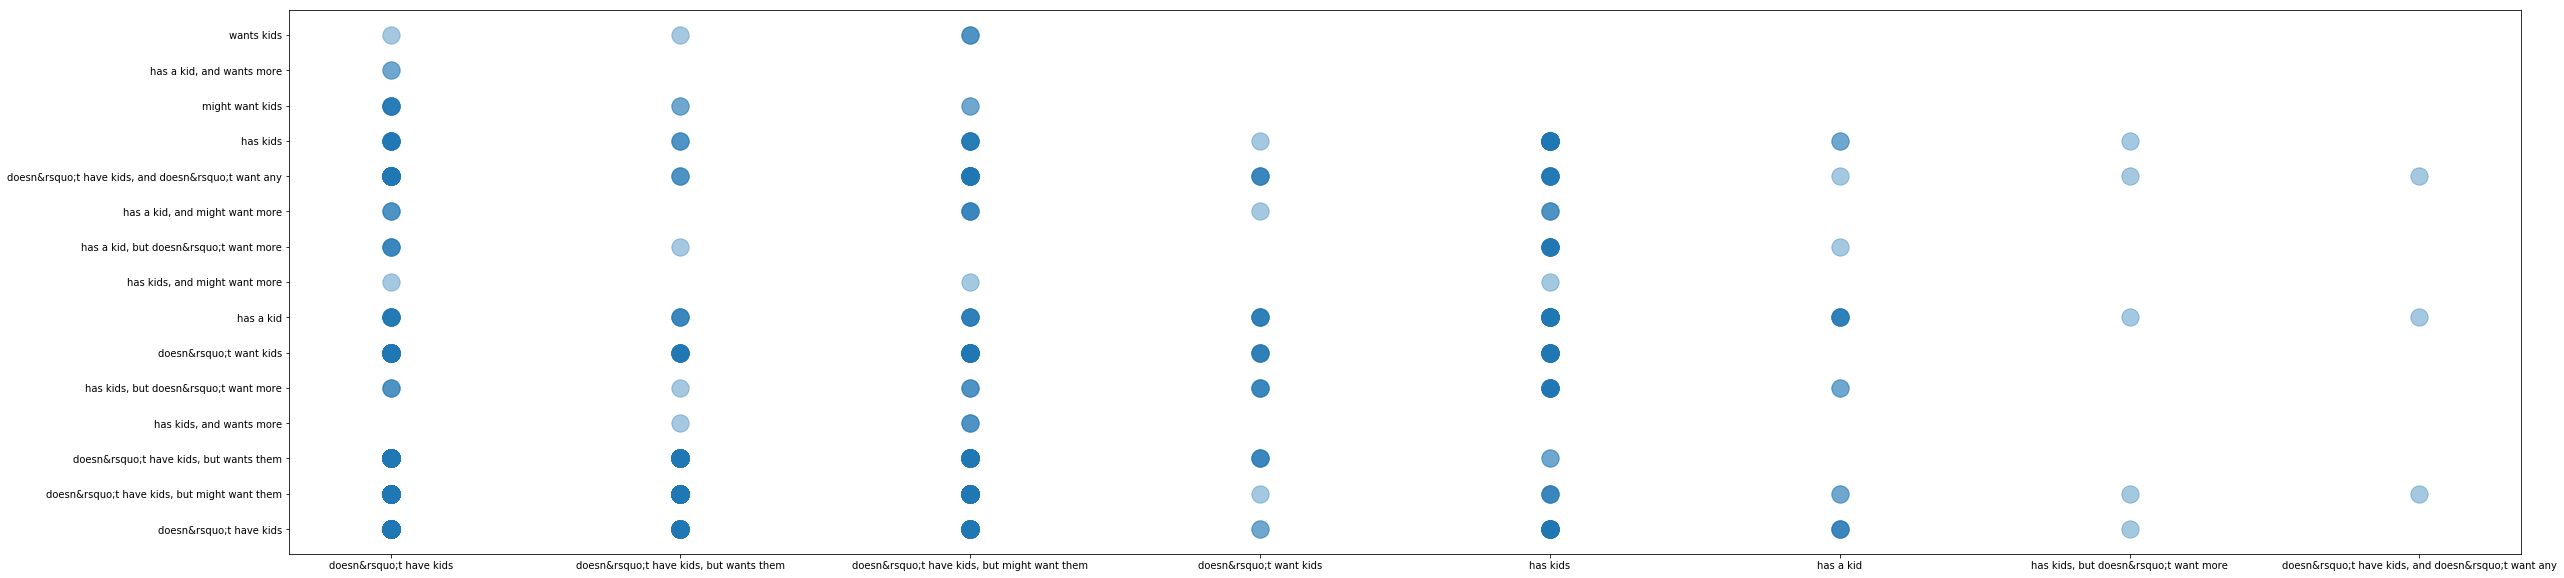

In [82]:
plt.figure(figsize=(40,10))
plt.scatter(income_pred_svc, y_test, alpha=0.4, s = 300)

In [83]:
accuracy_score(income_pred_svc, y_test)

0.29705215419501135

In [84]:
metrics.precision_score(y_test, income_pred_svc, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2668558617339008

In [85]:
metrics.recall_score(y_test, income_pred_svc, average = 'weighted')

0.29705215419501135

In [86]:
income_svc.score(x_test, y_test)

0.29705215419501135

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, income_pred_svc))

                                                     precision    recall  f1-score   support

                            doesn&rsquo;t have kids       0.34      0.62      0.44       222
doesn&rsquo;t have kids, and doesn&rsquo;t want any       0.33      0.02      0.03        66
       doesn&rsquo;t have kids, but might want them       0.28      0.24      0.26       210
            doesn&rsquo;t have kids, but wants them       0.28      0.30      0.29       145
                            doesn&rsquo;t want kids       0.19      0.06      0.09        81
                                          has a kid       0.29      0.11      0.16        46
                     has a kid, and might want more       0.00      0.00      0.00        11
                          has a kid, and wants more       0.00      0.00      0.00         2
             has a kid, but doesn&rsquo;t want more       0.00      0.00      0.00        14
                                           has kids       0.20      0

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 

In [88]:
kn_edu = KNeighborsClassifier()
naive_edu = GaussianNB()
svc_edu = SVC()

x_train, x_test, y_train, y_test = train_test_split(all_data.essay_len.values.reshape(-1,1) ,all_data.education_code ,test_size = 0.2, random_state = 12)


In [89]:
kn_edu.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
kn_edu_predict = kn_edu.predict(x_test)

In [91]:
accuracy_score(kn_edu_predict, y_test)

0.29138321995464855

In [92]:
metrics.precision_score(y_test, kn_edu_predict, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.21197689715761361

In [93]:
metrics.recall_score(y_test, kn_edu_predict, average = 'weighted')

0.29138321995464855

In [94]:
naive_edu_predict = naive_edu.fit(x_train, y_train).predict(x_test)

In [95]:
accuracy_score(naive_edu_predict, y_test)

0.3786848072562358

In [96]:
metrics.recall_score(y_test, naive_edu_predict, average = 'weighted')

0.3786848072562358

In [97]:
metrics.precision_score(y_test, naive_edu_predict, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.14356495530486124

In [98]:
svc_edu_predict = svc_edu.fit(x_train, y_train).predict(x_test)

In [99]:
accuracy_score(svc_edu_predict, y_test)

0.3321995464852608

In [100]:
metrics.recall_score(y_test, svc_edu_predict, average = 'weighted')

0.3321995464852608

In [101]:
metrics.precision_score(y_test, svc_edu_predict, average = 'weighted')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.20623583038174845

In [102]:
all_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'drinks_code',
       'drugs_code', 'smokes_code', 'essay_len', 'avg_word_length',
       'education_code', 'status_code', 'sex_code', 'job_code',
       'location_code', 'ethnicity_code'],
      dtype='object')

## PREDICTING INCOME WITH ESSAY LENGTH AND AVG WORD

In [103]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(income_features, all_data.income[all_data['income']!= -1], test_size = 0.2, random_state=10)

    
lin_inc = LinearRegression()
lin_inc_pred = lin_inc.fit(x_train, y_train).predict(x_test)



In [104]:
r2_score(y_test, lin_inc_pred)

-0.015933950689877907

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

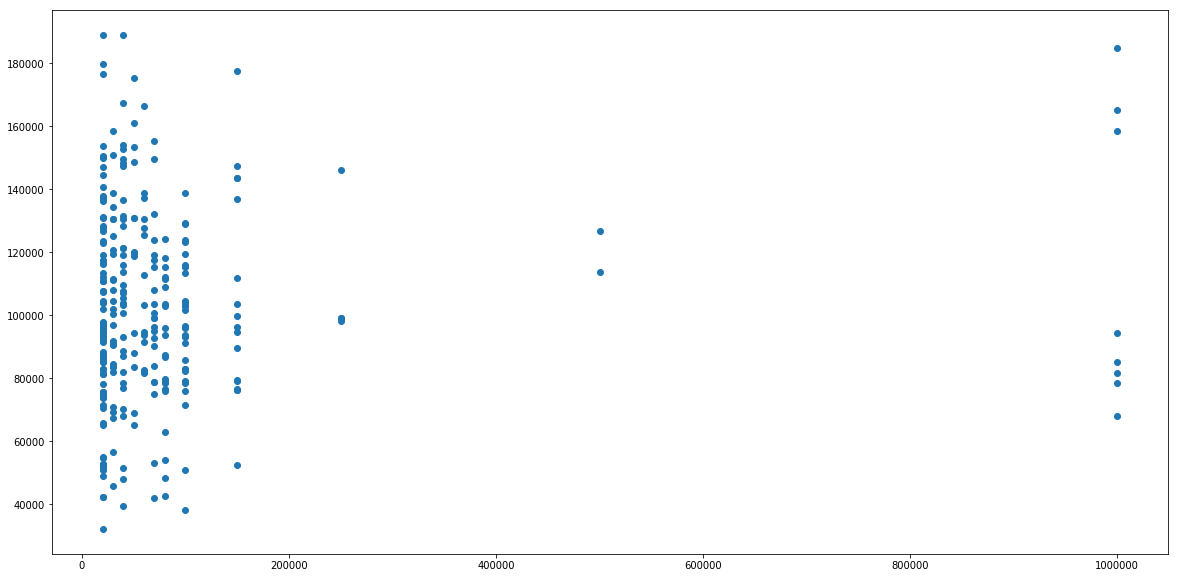

In [108]:
plt.figure(figsize = (20,10))

plt.scatter(y_test, lin_inc_pred)

In [109]:
from sklearn.neighbors import KNeighborsRegressor
k_reg = KNeighborsRegressor()
k_reg_pred = k_reg.fit(x_train, y_train).predict(x_test)
r2_score(y_test, k_reg_pred)

-0.3290814740261545

In [110]:
a=[]
b = []
for i in range(1,500):
    k_reg = KNeighborsRegressor(n_neighbors=i)
    k_reg_pred = k_reg.fit(x_train, y_train).predict(x_test)
    a.append(r2_score(y_test, k_reg_pred))
    b.append(i)
max(a)

0.031844747364780046

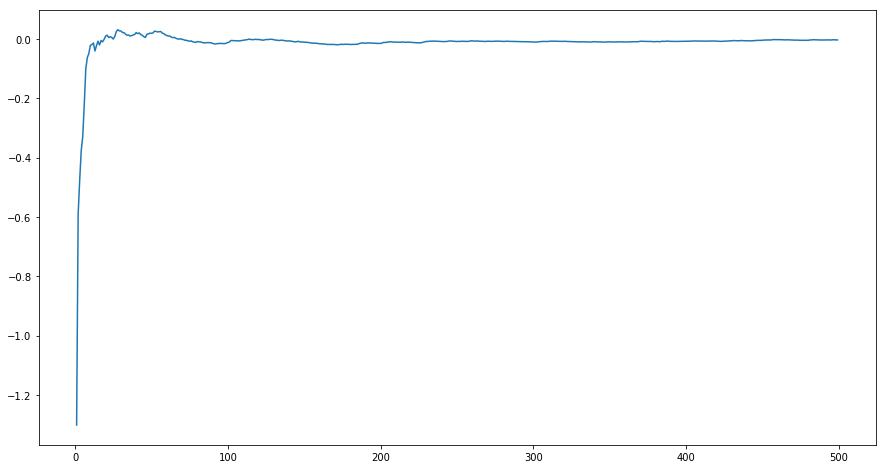

In [113]:
plt.figure(figsize = 
           
           (15,8))
plt.plot(b,a)

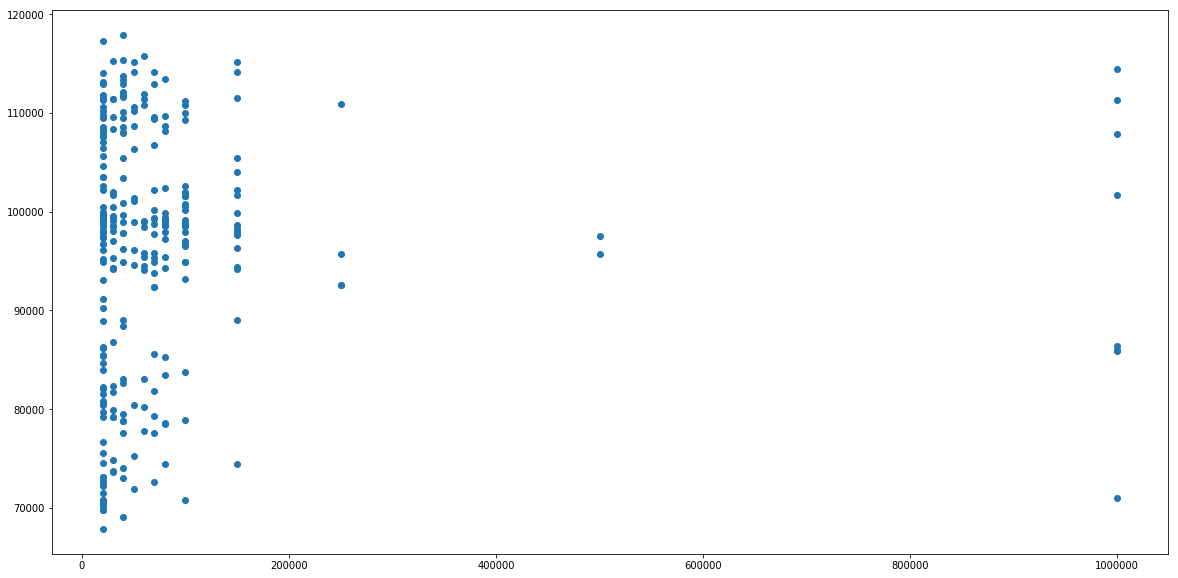

In [114]:
plt.figure(figsize = (20,10))

plt.scatter(y_test, k_reg_pred)

In [115]:
all_data.corr()

,age,height,income,drinks_code,drugs_code,smokes_code,essay_len,avg_word_length,education_code,status_code,sex_code,job_code,location_code,ethnicity_code
age,1.000000,-0.036197,-0.022141,-0.099674,-0.185742,-0.178652,0.012880,-0.044994,0.098646,-0.053143,0.068393,0.010665,0.073688,-0.123479
height,-0.036197,1.000000,0.077560,0.017310,0.084907,0.084061,0.016651,0.036731,0.065509,-0.008264,-0.659509,-0.047572,-0.006262,-0.015160
income,-0.022141,0.077560,1.000000,0.069081,0.093680,0.061111,-0.004508,0.040461,0.067183,-0.001710,-0.097393,0.063513,0.001579,0.040870
drinks_code,-0.099674,0.017310,0.069081,1.000000,0.233455,0.147806,-0.037861,-0.020272,0.036416,-0.012057,-0.001641,0.009418,-0.098416,-0.010450
drugs_code,-0.185742,0.084907,0.093680,0.233455,1.000000,0.341628,0.044093,0.087967,0.042807,0.075391,-0.078713,0.074232,-0.074907,0.013794
smokes_code,-0.178652,0.084061,0.061111,0.147806,0.341628,1.000000,-0.052603,-0.036592,0.075024,0.013856,-0.075513,0.063242,-0.007277,0.078593
essay_len,0.012880,0.016651,-0.004508,-0.037861,0.044093,-0.052603,1.000000,0.379793,-0.009634,0.119796,0.004233,-0.013580,-0.017947,-0.013641
avg_word_length,-0.044994,0.036731,0.040461,-0.020272,0.087967,-0.036592,0.379793,1.000000,0.011370,0.157214,-0.063494,0.008771,-0.047121,0.001034
education_code,0.098646,0.065509,0.067183,0.036416,0.042807,0.075024,-0.009634,0.011370,1.000000,0.008934,-0.054176,-0.000207,0.016909,0.015746
status_code,-0.053143,-0.008264,-0.001710,-0.012057,0.075391,0.013856,0.119796,0.157214,0.008934,1.000000,0.024382,0.006518,-0.011037,0.004065


In [116]:
from sklearn.neighbors import KNeighborsRegressor

## predicting age with regression


In [117]:
x_train, x_test, y_train, y_test = train_test_split(all_data[[ 'education_code','job_code', 'ethnicity_code', 'drugs_code','status_code']], all_data.age, test_size = 0.2, random_state=10)
a=[]
b=[]

for i in range(1,200):
    kn_reg_income = KNeighborsRegressor(n_neighbors=i)
    kn_reg_pred = kn_reg_income.fit(x_train,y_train).predict(x_test)

    a.append(kn_reg_income.score(x_test, y_test))
    b.append(i)
    

In [118]:
a.index(max(a))

16

In [119]:
max(a)

0.19103687011620063

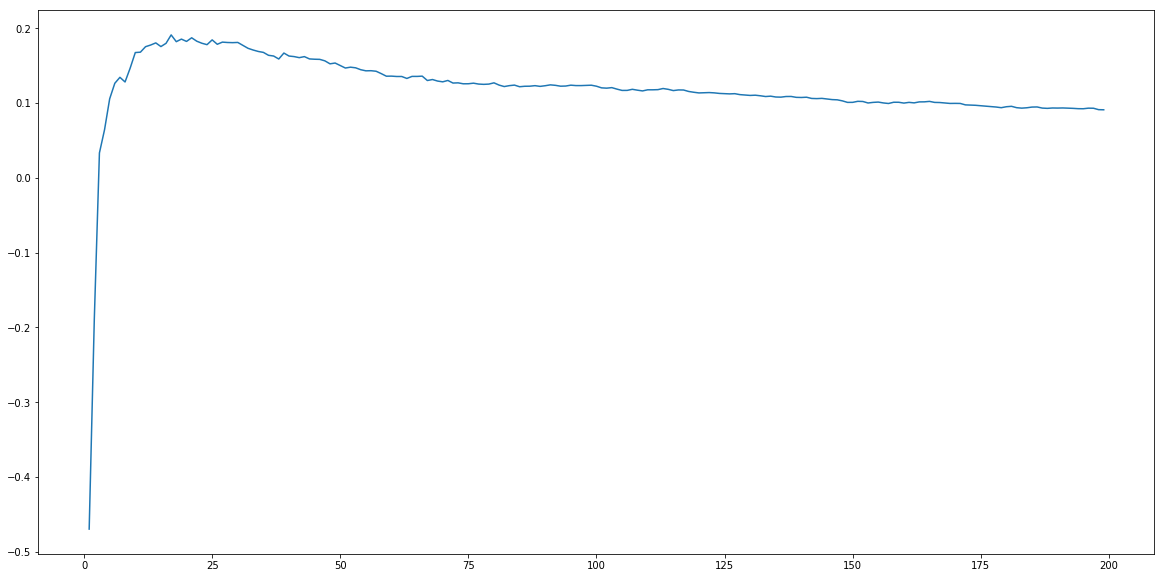

In [122]:
plt.figure(figsize = (20,10))

plt.plot(b,a)

In [134]:
kn_reg_income = KNeighborsRegressor(n_neighbors=17)
kn_reg_pred = kn_reg_income.fit(x_train,y_train).predict(x_test)
(kn_reg_income.score(x_test, y_test))


0.19103687011620063

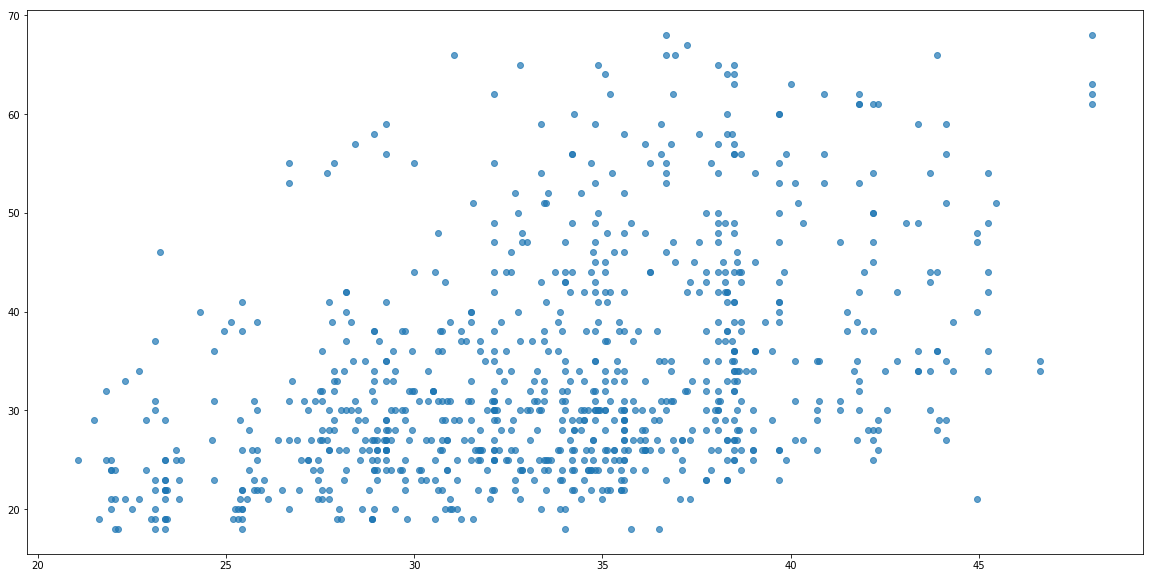

In [124]:
plt.figure(figsize = (20,10))

plt.scatter(kn_reg_pred, y_test, alpha = 0.7)

In [126]:
reg = LinearRegression()

In [127]:
reg_pred = reg.fit(x_train, y_train).predict(x_test)

In [128]:
r2_score(y_test, reg_pred)

0.0564133379863776

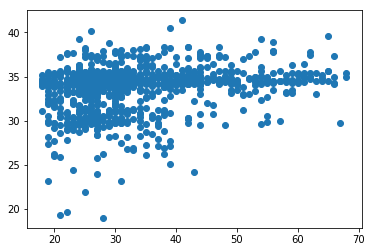

In [131]:
plt.scatter(y_test, reg_pred)

In [132]:
income_features.columns

Index(['education_code', 'sex_code', 'job_code', 'age', 'ethnicity_code'], dtype='object')

In [133]:
all_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'drinks_code',
       'drugs_code', 'smokes_code', 'essay_len', 'avg_word_length',
       'education_code', 'status_code', 'sex_code', 'job_code',
       'location_code', 'ethnicity_code'],
      dtype='object')